# Exercice 3 : Colorions !

L’objectif de cet exercice est de vous faire manipuler le coloriage de données, vous devrez notamment observer les tracés que vous aurez produit.

## Attention ! La première cellule de ce notebook doit être exécutée en premier, cependant merci de ne pas la lire, vous serez amené à en deviner le contenu !



In [19]:
# Exécuter sans regarder attentivement

nb_bits_couleurs = 8 # nombre de bits sur lequel chaque composante RVB est codée
nb_niveaux_gris = 2**nb_bits_couleurs # Il en découle le nombre de niveaux accessible pour chaque couleur
NOIR = 0 # Niveaux qui représente une luminosité nulle
BLANC = nb_niveaux_gris - 1 # Niveux qui représente une luminosité maximale 

def generateur_universel(Lniveaux, Lgris):
    """
    -----------------------------Préconditions--------------------------------
  
    Lniveau et Lgris sont tous deux des tableaux d'entiers de même longueur 
    n > 0.
    Lgris ne peut contenir que des entiers de [0; nb_niveaux_gris[.                       
    Lniveaux est strictement croissant de premier terme 0 et de dernier terme
    nb_niveaux_gris - 1. Par conséquent n <= nb_niveaux_gris.

    Si ces conditions ne sont pas respectées, le comportement de la fonction 
    n'est pas spécifié et une exeption peut être levée.
    
    --------------------------------Retour------------------------------------
    
    Retour :
 
    generateur_universel(Lniveaux, Lgris) est un tableau d'entier de 
    [NOIR;BLANC[ de longueur nb_niveaux_gris

    pour tout i de [0; n[ :
    generateur_universel(Lniveaux, Lgris)[Lniveau[i]] = Lgris[i]

    pour tout i de [0, n-1[ :
    les valeurs de position k dans ]Lniveaux[i], Lniveaux[i + 1][ sont des 
    troncatures à l'unité des interpolations linéaires entre Lgris[i] et 
    Lgris[i + 1] 
    
    -------------------------------Exemples------------------------------------
    
    On considère ici que nb_bits_couleurs = 8

    Si Lniveaux = [0, 5, 255] et Lgris = [0, 10, 10]
    generateur_universel(Lniveaux, Lgris) = [0, 2, 4, 6, 8, 10, 10, 10 .... 10]
    On a ici interpolé pour les éléments compris entre 0 et 5 les valeurs 
    (tronquées à l'unité) de  la fonction affine qui vaut 0 en 0 et 10 en 5.
    Même chose pour les éléments d'indices entre 10 et 255 avec la fonction 
    constante de valeur 10.
    
    Si Lniveaux = [0, 255] et Lgris = [255, 254]
    generateur_universel(Lniveaux, Lgris) = [255, 254, 254 .... 254]
    Ici l'interpolation est celle de la fonction affine qui vaut 255 en 0 et 
    254 en 255. Comme nous tronquons à l'unité, les 255 dernières valeurs valent
    254.

    Si Lniveaux = [0, 4, 5, 255] et Lgris = [30, 50, 200, 1]
    generateur_universel(Lniveaux, Lgris) 
                           = [30, 35, 40, 45, 50, 200, 199, 198, ... 3, 2, 1, 0]
    Ici on a créé une discontinuité entre les indices 4 et 5.
    
    ----------------------------------------------------------------------------
    """
    
    n = len(Lniveaux)
    
    # On vérifie que Lniveaux et Lgris correspondent bien aux spécifications.
    # Si ce n'est pas le cas, on lève une exeption.
    assert(n > 0)
    assert(n <= nb_niveaux_gris)
    assert(n == len(Lgris)) 
    assert(Lniveaux[0] == 0)
    assert(Lniveaux[n - 1] == nb_niveaux_gris - 1)
    assert(Lgris[0] >= NOIR)
    assert(Lgris[0] <= BLANC)

    # On crée le tableau que l'on retournera à la fin.
    palette = [0] * nb_niveaux_gris
    
    for i in range(n - 1) :
        
        a = int(Lniveaux[i]) # borne inf abscices
        b = int(Lniveaux[i + 1]) # borne sup abscices
        Ya = int(Lgris[i]) # borne inf ordonnées
        Yb = int(Lgris[i + 1]) # borne sup ordonnées
        
        
        # On vérifie que Liveaux et Lgris correspondent bien aux spécifications.
        # Si ce n'est pas le cas, on lève une exeption.
        
        assert(a < b) # Lniveaux strictement croissant
        assert(Yb >= NOIR) # les élements de Lgris sont positifs
        assert(Yb <= BLANC) # les élements de Lgris sont < nb_bits_couleurs
        

        # pente de la droite reliant les points de coordonnées(a, Ya) et (b, Yb)
        m = (Yb- Ya) / (b - a)

        # On affecte toutes les valeurs de a à la borne supérieure
        for x in range(a, b) :
            palette[x] = int(m * (x - a) + Ya)

    # On affecte la valeur du dernier élément de palette
    palette[nb_niveaux_gris - 1] = int(Lgris[n - 1])
    
    return(palette)


# Préparation de la palette id_niveaux_gris
Lniveaux = [0, nb_niveaux_gris - 1]
Lgris = [NOIR, BLANC]
id_niveaux_gris = [generateur_universel(Lniveaux, Lgris)] * 3
# On ne se préoccupe ici pas des problèmes d'alisasing puisque
# ce tableau n'est pas destiné à être modifié

# Préparation de la palette mont_simple
Lniveaux = [0, nb_niveaux_gris // 2 - 1, nb_niveaux_gris // 2, nb_niveaux_gris - 1]
Lgris = [NOIR, BLANC, BLANC, NOIR]
mont_simple = [generateur_universel(Lniveaux, Lgris)] * 3

# Préparation de la palette quatre_monts
Lniveaux = [0, nb_niveaux_gris * 1 // 8 - 1, nb_niveaux_gris * 1 // 8, nb_niveaux_gris * 2 // 8 - 1, nb_niveaux_gris * 2 // 8, nb_niveaux_gris * 3 // 8 - 1, nb_niveaux_gris * 3 // 8, nb_niveaux_gris * 4 // 8 - 1, nb_niveaux_gris * 4 // 8, nb_niveaux_gris * 5 // 8 - 1, nb_niveaux_gris * 5 // 8, nb_niveaux_gris * 6 // 8 - 1, nb_niveaux_gris * 6 // 8, nb_niveaux_gris * 7 // 8 - 1, nb_niveaux_gris * 7 // 8, nb_niveaux_gris - 1]
Lgris = [NOIR, BLANC,BLANC, NOIR, NOIR,BLANC,BLANC, NOIR, NOIR,BLANC,BLANC, NOIR, NOIR, BLANC, BLANC, NOIR]
quatre_monts =  [generateur_universel(Lniveaux, Lgris)] * 3

# Préparation de la palette deux_monts_assym
Lniveaux = [0, nb_niveaux_gris * 2// 8 - 1, nb_niveaux_gris * 5 // 8 - 1, nb_niveaux_gris * 6 // 8 -1, nb_niveaux_gris - 1 ]
Lgris = [NOIR, BLANC, NOIR, BLANC, NOIR]
deux_monts_assym =  [generateur_universel(Lniveaux, Lgris)] * 3

# Préparation de la palette couleurs_seuils

# On note que comme cette palette présente des couleurs, il nous faut travailler sur les 
# trois composantes RVB car cette fois, celles-ci seront différentes les unes des autres.

Lniveaux = [0, nb_niveaux_gris * 1 // 5 - 1,
            nb_niveaux_gris * 1 // 5, nb_niveaux_gris * 2 // 5 - 1,
            nb_niveaux_gris * 2 // 5, nb_niveaux_gris * 3 // 5 - 1,
            nb_niveaux_gris * 3 // 5, nb_niveaux_gris * 4 // 5 - 1,
            nb_niveaux_gris * 4 // 5, nb_niveaux_gris - 1]

LgrisR = [BLANC, BLANC, NOIR,  NOIR,  NOIR,  NOIR,  NOIR, NOIR, BLANC, BLANC]
LgrisG = [NOIR,  NOIR,  BLANC, BLANC, NOIR,  NOIR,  NOIR, NOIR, BLANC, BLANC]
LgrisB = [NOIR,  NOIR,  NOIR,  NOIR,  BLANC, BLANC, NOIR, NOIR, BLANC, BLANC]

couleurs_seuils = [generateur_universel(Lniveaux, LgrisR),generateur_universel(Lniveaux, LgrisG),generateur_universel(Lniveaux, LgrisB)]

Vous pouvez lire toutes les cellules à partir de maintenant.

Commençons par importer les librairies nécessaires.

In [20]:
import matplotlib.image as matimg
import matplotlib.pyplot as plt

Créons maintenant un jeu de données à représenter.

In [21]:
# On prend une image de 256 x 256 pixels..
dimension = 256

#--------------------- Création du jeu de données-------------------#

donnees = []
for i in range(dimension) :
    # Remplissage des lignes
    donnees.append([0]*dimension)
    for j in range(dimension//2) :
        donnees[i][j] = nb_niveaux_gris - 1 - i
        donnees[i][dimension - 1 - j] = i

Les données sont maintenant remplies, on peut désormais travaillersur la matrice donnees.

La fonction cree_image définie ci-dessous, permet de créer une image à partir d'un jeu de données et d'autres paramètres.
Lisez cette fonction et notamment ses commentaire afin de comprendre commment l'utiliser.


In [22]:
#########################################################################
#                                                                       #
# La fonction de création d'image permet de créer des images en fonction#
# des données passées en arguments (voir ses spécifications).           #
#                                                                       #
#   CETTE FONCTION NE DOIT PAS ÊTRE MODIFIÉE, LES DONNÉES ET CHOIX DE   #
#                 REPRÉSENTATION N'EN DÉPENDENT PAS.                    #
#                                                                       #
# Les palettes de couleurs fournies sont créées dans la première cellule#
# de ce notebook.                                                       #
#                                                                       #
#########################################################################

def cree_image(donnees, palette, nom) :
    """
    Crée une image à partir des données de donnees avec les 
    couleurs imposées par la palette de couleur palette qui est une 
    matrice de taille 3 x nb_niveaux_gris, c'est à dire un tableau à 3
    éléments dont chaque élément est un tableau à nb_niveaux_gris 
    éléménts. L'image est enregistrée sous le nom nom. ATTENTION nom est 
    une chaine de caractère et doit contenir l'extension du fichier crée 
    par exemple .png. 'mon_image.png' conviendrait. L'image sera 
    enregistrée dans le répertoire contenant le script.
    """
    
    # Création de la matrice contenant les couleurs (tableau d'entiers
    # à trois éléments. On commence par créer une matrice vide à
    # laquelle on ajoutera des lignes au fur et à mesure et l'on
    # remplira ces lignes de la même manière.
    image = []

    for i in range(dimension) :
        image.append([]) # création de la ligne i
        for j in range(dimension) :
            # ajout du coefficient j de la ligne i
            d = donnees[i][j]
            triplet_couleurs = (palette[0][d],
                                palette[1][d],
                                palette[2][d])
            # On vérifie que les niveaux des couleurs sont bien dans
            # la bonne plage.
            assert(triplet_couleurs[0] <= BLANC)
            assert(triplet_couleurs[0] >= NOIR)
            assert(triplet_couleurs[1] <= BLANC)
            assert(triplet_couleurs[1] >= NOIR)
            assert(triplet_couleurs[2] <= BLANC)
            assert(triplet_couleurs[2] >= NOIR)
            # On ajoute le triplet au tableau représentant l'image
            image[i].append(triplet_couleurs)
            
    # Création de l'image. Celle-ci est enregistrée dans le répertoire
    # contenant le script.
    plt.imshow(image)


## Question 1
Pour chacunes des palettes de couleurs suivantes, tracez la figure et tirez des conclusions sur la structure des données.

a- mont_simple

b- quatre_monts

c- deux_monts_assym

d- couleurs_seuils

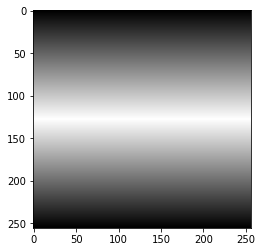

In [23]:
# affichage de mont_simple
cree_image(donnees, mont_simple, "mont_simple.png")

À priori, sur une même ligne, les données semblent être les mêmes. Elles semblent également être symétrique selon un axe horizontal passant par le milieu de la figure.

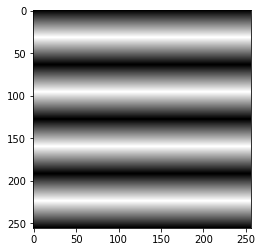

In [24]:
# affichage de quatre monts
cree_image(donnees, quatre_monts, "quatre_monts.png")

Ce coloriage confirme notre première observation : les données semblent bien être les mêmes sur une même ligne. On retrouve également une certaine symétrie entre le bas et le haut, mais les données varient peut-être plus que ce que l’on aurait pu penser à priori. De plus elles semblent périodiques verticalement, mais cela est contredit par l’image obtenue à la question 1-a.

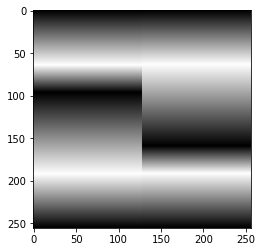

In [25]:
# affichage de deux_monts_assym
cree_image(donnees, deux_monts_assym, "deux_monts_assym.png")

Il apparaît cette fois-ci que toutes les données d’une même ligne ne sont pas identiques… du moins à mi-hauteur, il est difficile de voir si cela est conservé en haut et en bas. Il semble que le haut et le bas soient à peu près le symétrique l’un de l'autre.

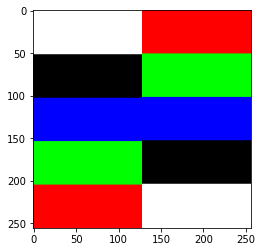

In [26]:
# affichage de couleurs_seuils
cree_image(donnees, couleurs_seuils, "couleurs_seuils.png")

Chouette de la couleur ! 

Par contre cela ne va plus du tout, il semblerait que cette fois seules les lignes du milieu ne contiendraient qu’une seule valeur... et le haut et le bas ne sont en fait pas symétriques... et les données ne semblent plus continues… On observe par contre une symétrie centrale qui ne contredit aucune observation faite précédemment.


Mais pourquoi n’arrive-t-on pas à lire ces images ? 


Parce que l’on n’a pas de légende qui nous permettrait de comprendre ce que représente chaque couleur.


## Question 2

Tracer la figure correspondant à la fonction de coloriage id_niveaux_de_gris. Celle-ci représente les données en niveau de gris : l’intensité lumineuse du pixel est égale à la donnée associée au pixel. L’échelle est donc linéaire 0 étant en noir et 255 en blanc.

Que pouvez-vous dire des représentations de la question précédente ?


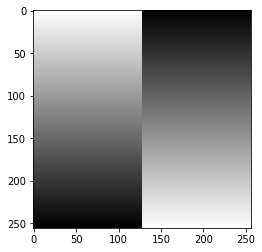

In [27]:
# affichage de id_niveaux_de_gris
cree_image(donnees, id_niveaux_gris, "id_niveaux_gris.png")

Cette fois nous avons une légende ! Nous pouvons donc lire les données visualisées. On retrouve que celles-ci sont identiques sur une même moitié de ligne (ce dont on est sûr, sauf détail passant inaperçu, car aucun niveau de gris n’est  utilisé pour deux valeurs différentes). On retrouve la symétrie centrale conjecturée à la question précédente.

## Question 3
Conjecturer maintenant l’allure des fonctions de coloriage de la question 1, c'est-à-dire quelle couleur est associée à quelle donnée.

Pour les fonctions de coloriage des questions 1-a et 1-b on peut déjà conjecturer que pour une donnée de valeur n entre 0 et 255, il est associé la même couleur aux données de valeur 255 - n.

Pour les fonctions de coloriage des questions 1-a, 1-b et 1-c on peut déduire que le niveau de gris augmente puis diminue en fonction de la donnée. Dans les deux premiers cas cela donne l’illusion que les lignes ne contiennent qu’une seule et même valeur.

Pour la fonction de coloriage de la question 1-d, on voit que chaque couleur représente une plage de données.

#### Si vous voulez en savoir plus, vous pouvez tracer le niveau de couleur (RGB) de chaque fonction en fonction de la donnée d’entrée.


## Question 4

À vous de jouer ! Vous pouvez maintenant créer vos propres fonctions de coloriage afin de voir quelles fonctions peuvent être trompeuses. Pour cela, vous pouvez utiliser la fonction generateur_universel définie dans la première cellule. Les commentaires qui lui sont attribués devraient vous permettre de la comprendre

Vous pouvez également créer un autre jeu de données. 

## Attention à bien respecter le cadre du code qui est indiqué en commentaires.


In [18]:
# A vous de jouer !
